In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/retail_sales_dataset.csv')

In [5]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scalar = MinMaxScaler()

In [9]:
df['per_unit_minmax'] = scalar.fit_transform(df[['Price per Unit']])

In [10]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,per_unit_minmax
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0.052632
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1.000000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,0.010526
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,1.000000
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,0.052632


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scalar_new = StandardScaler()

In [14]:
df['per_unit_standard'] = scalar_new.fit_transform(df[['Price per Unit']])

In [15]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,per_unit_minmax,per_unit_standard
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0.052632,-0.685123
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1.000000,1.688464
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,0.010526,-0.790615
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,1.000000,1.688464
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,0.052632,-0.685123


In [17]:
df = pd.get_dummies(df, columns=['Gender'])

In [18]:
df.head()

,Transaction ID,Date,Customer ID,Age,Product Category,Quantity,Price per Unit,Total Amount,per_unit_minmax,per_unit_standard,Gender_Female,Gender_Male
0,1,2023-11-24,CUST001,34,Beauty,3,50,150,0.052632,-0.685123,False,True
1,2,2023-02-27,CUST002,26,Clothing,2,500,1000,1.000000,1.688464,True,False
2,3,2023-01-13,CUST003,50,Electronics,1,30,30,0.010526,-0.790615,False,True
3,4,2023-05-21,CUST004,37,Clothing,1,500,500,1.000000,1.688464,False,True
4,5,2023-05-06,CUST005,30,Beauty,2,50,100,0.052632,-0.685123,False,True


In [19]:
df = pd.get_dummies(df, columns=['Product Category'])

In [20]:
df.head()

,Transaction ID,Date,Customer ID,Age,Quantity,Price per Unit,Total Amount,per_unit_minmax,per_unit_standard,Gender_Female,Gender_Male,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics
0,1,2023-11-24,CUST001,34,3,50,150,0.052632,-0.685123,False,True,True,False,False
1,2,2023-02-27,CUST002,26,2,500,1000,1.000000,1.688464,True,False,False,True,False
2,3,2023-01-13,CUST003,50,1,30,30,0.010526,-0.790615,False,True,False,False,True
3,4,2023-05-21,CUST004,37,1,500,500,1.000000,1.688464,False,True,False,True,False
4,5,2023-05-06,CUST005,30,2,50,100,0.052632,-0.685123,False,True,True,False,False


In [23]:
#polynomial intersection
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

x_poly = poly.fit_transform(df[['Price per Unit', 'Quantity']])
feature_names = poly.get_feature_names_out(['Price per Unit', 'Quantity'])
df_poly = pd.DataFrame(x_poly, columns=feature_names)

df_poly


,1,Price per Unit,Quantity,Price per Unit^2,Price per Unit Quantity,Quantity^2
0,1.0,50.0,3.0,2500.0,150.0,9.0
1,1.0,500.0,2.0,250000.0,1000.0,4.0
2,1.0,30.0,1.0,900.0,30.0,1.0
3,1.0,500.0,1.0,250000.0,500.0,1.0
4,1.0,50.0,2.0,2500.0,100.0,4.0
...,...,...,...,...,...,...
995,1.0,50.0,1.0,2500.0,50.0,1.0
996,1.0,30.0,3.0,900.0,90.0,9.0
997,1.0,25.0,4.0,625.0,100.0,16.0
998,1.0,50.0,3.0,2500.0,150.0,9.0


In [24]:
df.head()

,Transaction ID,Date,Customer ID,Age,Quantity,Price per Unit,Total Amount,per_unit_minmax,per_unit_standard,Gender_Female,Gender_Male,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics
0,1,2023-11-24,CUST001,34,3,50,150,0.052632,-0.685123,False,True,True,False,False
1,2,2023-02-27,CUST002,26,2,500,1000,1.000000,1.688464,True,False,False,True,False
2,3,2023-01-13,CUST003,50,1,30,30,0.010526,-0.790615,False,True,False,False,True
3,4,2023-05-21,CUST004,37,1,500,500,1.000000,1.688464,False,True,False,True,False
4,5,2023-05-06,CUST005,30,2,50,100,0.052632,-0.685123,False,True,True,False,False


In [25]:
df['multiplication_price_quantity']= df['Price per Unit'] * df['Quantity']

In [26]:
df.head()

,Transaction ID,Date,Customer ID,Age,Quantity,Price per Unit,Total Amount,per_unit_minmax,per_unit_standard,Gender_Female,Gender_Male,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics,multiplication_price_quantity
0,1,2023-11-24,CUST001,34,3,50,150,0.052632,-0.685123,False,True,True,False,False,150
1,2,2023-02-27,CUST002,26,2,500,1000,1.000000,1.688464,True,False,False,True,False,1000
2,3,2023-01-13,CUST003,50,1,30,30,0.010526,-0.790615,False,True,False,False,True,30
3,4,2023-05-21,CUST004,37,1,500,500,1.000000,1.688464,False,True,False,True,False,500
4,5,2023-05-06,CUST005,30,2,50,100,0.052632,-0.685123,False,True,True,False,False,100


In [27]:
#binning

df['binning_age'] = pd.cut(df['Age'], bins= [0, 12, 25, 60, 100], labels=['children', 'youth', 'adult', 'senior'])

In [29]:
df.head(10)

,Transaction ID,Date,Customer ID,Age,Quantity,Price per Unit,Total Amount,per_unit_minmax,per_unit_standard,Gender_Female,Gender_Male,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics,multiplication_price_quantity,binning_age
0,1,2023-11-24,CUST001,34,3,50,150,0.052632,-0.685123,False,True,True,False,False,150,adult
1,2,2023-02-27,CUST002,26,2,500,1000,1.000000,1.688464,True,False,False,True,False,1000,adult
2,3,2023-01-13,CUST003,50,1,30,30,0.010526,-0.790615,False,True,False,False,True,30,adult
3,4,2023-05-21,CUST004,37,1,500,500,1.000000,1.688464,False,True,False,True,False,500,adult
4,5,2023-05-06,CUST005,30,2,50,100,0.052632,-0.685123,False,True,True,False,False,100,adult
5,6,2023-04-25,CUST006,45,1,30,30,0.010526,-0.790615,True,False,True,False,False,30,adult
6,7,2023-03-13,CUST007,46,2,25,50,0.000000,-0.816989,False,True,False,True,False,50,adult
7,8,2023-02-22,CUST008,30,4,25,100,0.000000,-0.816989,False,True,False,False,True,100,adult
8,9,2023-12-13,CUST009,63,2,300,600,0.578947,0.633537,False,True,False,False,True,600,senior
9,10,2023-10-07,CUST010,52,4,50,200,0.052632,-0.685123,True,False,False,True,False,200,adult


In [31]:
import numpy as np
df['total_price_log']= np.log(df['Total Amount'])

In [32]:
df.head()

,Transaction ID,Date,Customer ID,Age,Quantity,Price per Unit,Total Amount,per_unit_minmax,per_unit_standard,Gender_Female,Gender_Male,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics,multiplication_price_quantity,binning_age,total_price_log
0,1,2023-11-24,CUST001,34,3,50,150,0.052632,-0.685123,False,True,True,False,False,150,adult,5.010635
1,2,2023-02-27,CUST002,26,2,500,1000,1.000000,1.688464,True,False,False,True,False,1000,adult,6.907755
2,3,2023-01-13,CUST003,50,1,30,30,0.010526,-0.790615,False,True,False,False,True,30,adult,3.401197
3,4,2023-05-21,CUST004,37,1,500,500,1.000000,1.688464,False,True,False,True,False,500,adult,6.214608
4,5,2023-05-06,CUST005,30,2,50,100,0.052632,-0.685123,False,True,True,False,False,100,adult,4.605170


In [33]:
df.shape

(1000, 17)

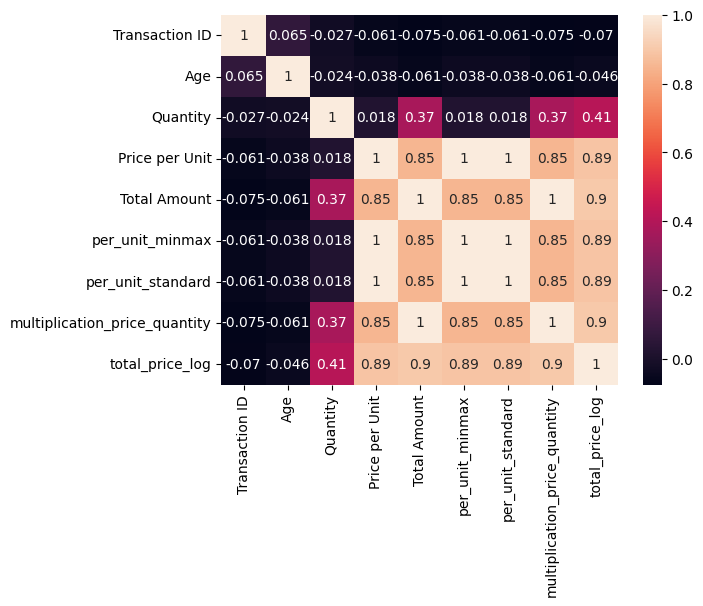

In [35]:
#corelation within the data
import seaborn as sns
import matplotlib.pyplot as plt

numeric_values = df.select_dtypes(include=['number'])
sns.heatmap(numeric_values.corr(), annot=True)
plt.show()


In [36]:
df.head()



,Transaction ID,Date,Customer ID,Age,Quantity,Price per Unit,Total Amount,per_unit_minmax,per_unit_standard,Gender_Female,Gender_Male,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics,multiplication_price_quantity,binning_age,total_price_log
0,1,2023-11-24,CUST001,34,3,50,150,0.052632,-0.685123,False,True,True,False,False,150,adult,5.010635
1,2,2023-02-27,CUST002,26,2,500,1000,1.000000,1.688464,True,False,False,True,False,1000,adult,6.907755
2,3,2023-01-13,CUST003,50,1,30,30,0.010526,-0.790615,False,True,False,False,True,30,adult,3.401197
3,4,2023-05-21,CUST004,37,1,500,500,1.000000,1.688464,False,True,False,True,False,500,adult,6.214608
4,5,2023-05-06,CUST005,30,2,50,100,0.052632,-0.685123,False,True,True,False,False,100,adult,4.605170


In [39]:
df.drop(columns=['Transaction ID', 'Date', 'Customer ID'], inplace=True)

KeyError: "['Transaction ID', 'Date', 'Customer ID'] not found in axis"

In [38]:
df.head()

,Age,Quantity,Price per Unit,Total Amount,per_unit_minmax,per_unit_standard,Gender_Female,Gender_Male,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics,multiplication_price_quantity,binning_age,total_price_log
0,34,3,50,150,0.052632,-0.685123,False,True,True,False,False,150,adult,5.010635
1,26,2,500,1000,1.000000,1.688464,True,False,False,True,False,1000,adult,6.907755
2,50,1,30,30,0.010526,-0.790615,False,True,False,False,True,30,adult,3.401197
3,37,1,500,500,1.000000,1.688464,False,True,False,True,False,500,adult,6.214608
4,30,2,50,100,0.052632,-0.685123,False,True,True,False,False,100,adult,4.605170


In [40]:
df.drop(columns=['binning_age'], inplace=True)

In [41]:
df.head()

,Age,Quantity,Price per Unit,Total Amount,per_unit_minmax,per_unit_standard,Gender_Female,Gender_Male,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics,multiplication_price_quantity,total_price_log
0,34,3,50,150,0.052632,-0.685123,False,True,True,False,False,150,5.010635
1,26,2,500,1000,1.000000,1.688464,True,False,False,True,False,1000,6.907755
2,50,1,30,30,0.010526,-0.790615,False,True,False,False,True,30,3.401197
3,37,1,500,500,1.000000,1.688464,False,True,False,True,False,500,6.214608
4,30,2,50,100,0.052632,-0.685123,False,True,True,False,False,100,4.605170


In [42]:
x= df.drop(columns=['Total Amount'])
y= df['Total Amount']

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
#feature importance



RandomForestRegressor()

In [48]:
#feature importance
model = RandomForestRegressor()
model.fit(x, y)
feature_importance = model.feature_importances_
feature_importance
features_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
features_df


,Feature,Importance
0,Age,0.000000
1,Quantity,0.008639
2,Price per Unit,0.007476
3,per_unit_minmax,0.012604
4,per_unit_standard,0.010950
5,Gender_Female,0.000000
6,Gender_Male,0.000000
7,Product Category_Beauty,0.000000
8,Product Category_Clothing,0.000000
9,Product Category_Electronics,0.000000
